# Miniproyecto 2

Modelos y simulación - Sección 10

Fecha: 14-08-2020

## Integrantes:

* Oscar Juárez - 17315
* José Cifuentes - 17509

## Librerías de python:



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time

## Ejercicio 1 - Función acumulada ponderada

Funciones útiles:

Random Uniforme de 0 a 1

In [ ]:
def pseudo(a,m):
	def inner_pseudo(xo,n):
		items=list(range(n))
		items[0]=xo

		for i in range(1,n):
			items[i]=(a*items[i-1])%m

		return [i/float(m) for i in items]
	return inner_pseudo
mi_pseudo2=pseudo(m=2**31-1,a=7**5)
#mis_randoms2=mi_pseudo2(xo=5,n=CANTIDAD)

Definimos una algoritmo Generador de V a partir de F

In [ ]:
'''
  F es la funcion de probabilidad acumulada
'''
def generarV(F,cantidad):
  mis_randoms2=mi_pseudo2(xo=int(time.time()),n=cantidad)
  resultados=[]
  Fprob = [0]
  Fprob += list(F.keys())

  for numero in mis_randoms2:
    for i in range(0, len(Fprob)-1):
      if(Fprob[i] <= numero < Fprob[i+1]):
        resultados.append(F[Fprob[i+1]])

  return resultados

A continuación se demuestra que el algoritmo genera adecuadamente V

In [ ]:
F = {
    0.3: 'A',
    0.4: 'B',
    0.9: 'C',
    1: 'D',
}
ITERACIONES=100000
secuenciaV=generarV(F,ITERACIONES)

for i in F.values():
  print(i+" sale con probabilidad de: "+str(secuenciaV.count(i)/ITERACIONES))


A sale con probabilidad de: 0.29899
B sale con probabilidad de: 0.09962
C sale con probabilidad de: 0.50204
D sale con probabilidad de: 0.09935


Para esta F en particular podemos notar que el elemento A debería de salir con una probabilidad de 0.3, el elemento B con probabilidad de 0.1, C con 0.5 y finalmente C con probabilidad de 0.1.
Si nos damos cuenta, nuestros resultados salen con probabilidades aproximadas y mientras aumentemos más las iteraciones más se asemejarán a la probabilidad teórica. 


## Ejercicio 2 - función acumulada ponderada (programa)

Programamos una función que retorne una variable aleatoria con función de masa de probabilidad.

In [2]:
def AcumulacionPonderada(x, fn):
  cant = len(fn)-1
  contador = 0
  ponderacion = float(0)

  while contador <= cant:
    if contador == cant and ponderacion <= x < 1:
      return fn[cant][0]
    
    elif contador == 0 and 0.0 <= x < fn[0][1]:
      return fn[0][0]
    
    elif ponderacion <= x < (ponderacion + fn[contador+1][1]):
      return fn[contador][0]
    
    elif contador == 0:
      ponderacion = fn[0][1]
    
    else:
      ponderacion += fn[contador+1][1]
    
    contador +=1
  

#### Distribución de ejemplo

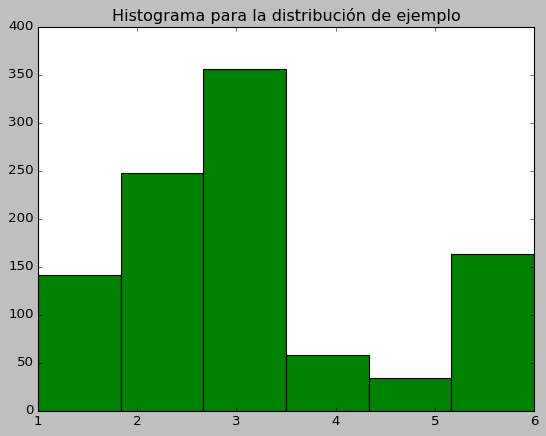

In [6]:
pesosMasa = [(1,0.10),
             (2,0.15),
             (3,0.30),
             (4,0.35),
             (5,0.07),
             (6,0.03)]

plt.style.use('classic')
plt.hist(
    [AcumulacionPonderada(random.random(), pesosMasa) for _ in range(1,1000)],
    bins=6,
    color='green'
    )
plt.title('Histograma para la distribución de ejemplo')
plt.show()

## Ejercicio 3 - Valor presente neto

**Funciones útiles:**

Uniforme de 0 a 1:

In [ ]:
def pseudo(a,m):
	def inner_pseudo(xo,n):
		items=list(range(n))
		items[0]=xo

		for i in range(1,n):
			items[i]=(a*items[i-1])%m

		return [i/float(m) for i in items]
	return inner_pseudo
mi_pseudo2=pseudo(m=2**31-1,a=7**5)

Exponencial:

In [ ]:
def exponencial(Lambda,uniforme):
  U=uniforme
  return -(1/Lambda)*math.log(U)

Normal:

In [ ]:
def normal(mu,sigma,uniformesList):
  while True:
    Y1=exponencial(Lambda=1, uniforme=uniformesList.pop())
    Y2=exponencial(Lambda=1, uniforme=uniformesList.pop())
    if Y2 - ((Y1-1) ** 2) / 2 > 0:
      Y = Y2-((Y1-1) ** 2) / 2
      U = uniformesList.pop()
      if U<=0.5:
        return mu + sigma*Y1
      else:
        return mu - sigma*Y1


Uniforme en x intervalo:


In [ ]:
def uniforme(minimo,maximo,cantidad): 
  return [ minimo + (i * (maximo - minimo)) for i in mi_pseudo2(xo=int(time.time()),n=cantidad)]

Valor presente neto:

In [ ]:
'''
  Valor de inversion positivo
  flujoDeCaja lista
'''
def VPN(inversion, flujoDeCaja, interes):
  vpn = -inversion
  for i in range(len(flujoDeCaja)):
    vpn += flujoDeCaja[i] / (1+interes) ** (i+1)
  return vpn

### Simulación 100 iteraciones 

#### Proyecto Hotel

In [ ]:
ITERACIONES=100
INVERSION=800
INTERES=0.1
seed=int(time.time())
listaRandom=mi_pseudo2(xo=seed,n=ITERACIONES*100)
FLUJO_DE_CAJA=[
               sum([normal(-800,50,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum([normal(-800,100,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum([normal(-700,150,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum([normal(300,200,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum([normal(400,200,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum([normal(500,200,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum(uniforme(200,8440,ITERACIONES))/ITERACIONES
               
]
print('Valor presente neto: ')
VPN(INVERSION,FLUJO_DE_CAJA,INTERES)

Valor presente neto: 


-17.206881067196264

#### Proyecto Centro Comercial

In [ ]:
ITERACIONES=100
INVERSION=900
INTERES=0.1
seed=int(time.time())
listaRandom=mi_pseudo2(xo=seed,n=ITERACIONES*100)
FLUJO_DE_CAJA=[
               sum([normal(-600,50,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum([normal(-200,50,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum([normal(-600,100,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum([normal(250,150,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum([normal(350,150,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum([normal(400,150,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum(uniforme(1600,6000,ITERACIONES))/ITERACIONES
               
]
print('Valor presente neto: ')
VPN(INVERSION,FLUJO_DE_CAJA,INTERES)

Valor presente neto: 


359.0325791434318

### Simulación 1000 iteraciones 

#### Proyecto Hotel

In [ ]:
ITERACIONES=1000
INVERSION=800
INTERES=0.1
seed=int(time.time())
listaRandom=mi_pseudo2(xo=seed,n=ITERACIONES*100)
FLUJO_DE_CAJA=[
               sum([normal(-800,50,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum([normal(-800,100,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum([normal(-700,150,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum([normal(300,200,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum([normal(400,200,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum([normal(500,200,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum(uniforme(200,8440,ITERACIONES))/ITERACIONES
               
]
print('Valor presente neto: ')
VPN(INVERSION,FLUJO_DE_CAJA,INTERES)

Valor presente neto: 


208.98411007375057

#### Proyecto Centro Comercial

In [ ]:
ITERACIONES=1000
INVERSION=900
INTERES=0.1
seed=int(time.time())
listaRandom=mi_pseudo2(xo=seed,n=ITERACIONES*100)
FLUJO_DE_CAJA=[
               sum([normal(-600,50,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum([normal(-200,50,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum([normal(-600,100,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum([normal(250,150,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum([normal(350,150,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum([normal(400,150,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum(uniforme(1600,6000,ITERACIONES))/ITERACIONES
               
]
print('Valor presente neto: ')
VPN(INVERSION,FLUJO_DE_CAJA,INTERES)

Valor presente neto: 


487.3728769989498

### Simulación 10000 iteraciones 

#### Proyecto Hotel

In [ ]:
ITERACIONES=10000
INVERSION=800
INTERES=0.1
seed=int(time.time())
listaRandom=mi_pseudo2(xo=seed,n=ITERACIONES*100)
FLUJO_DE_CAJA=[
               sum([normal(-800,50,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum([normal(-800,100,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum([normal(-700,150,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum([normal(300,200,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum([normal(400,200,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum([normal(500,200,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum(uniforme(200,8440,ITERACIONES))/ITERACIONES
               
]
print('Valor presente neto: ')
VPN(INVERSION,FLUJO_DE_CAJA,INTERES)

Valor presente neto: 


220.63011697646652

#### Proyecto Centro Comercial

In [ ]:
ITERACIONES=10000
INVERSION=900
INTERES=0.1
seed=int(time.time())
listaRandom=mi_pseudo2(xo=seed,n=ITERACIONES*100)
FLUJO_DE_CAJA=[
               sum([normal(-600,50,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum([normal(-200,50,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum([normal(-600,100,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum([normal(250,150,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum([normal(350,150,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum([normal(400,150,listaRandom) for _ in range(ITERACIONES)])/ITERACIONES,
               sum(uniforme(1600,6000,ITERACIONES))/ITERACIONES
               
]
print('Valor presente neto: ')
VPN(INVERSION,FLUJO_DE_CAJA,INTERES)

Valor presente neto: 


495.0926046837901

### Interpretación 
Podemos notar que, en las tres simulaciones realizadas, siempre el proyecto del centro comercial tuvo un valor presente neto mayor. Esto quiere decir que este proyecto es el mejor para invertir ya que nos generará mayor utilidad que el proyecto del hotel. 

## Ejercicio 4 - Repartidos de periódicos

Definimos funciones y variables que nos ayudarán con los resultados.


In [ ]:
# valores constantes
precioVenta = 2.5
precioOriginal = 1.5
precioReembolso = 0.5
nombres = ['Compra nueve', 'Compra diez', 'Compra once']

# Variables calculadas
ganancia = precioVenta - precioOriginal
perdida = precioOriginal - precioReembolso

def PidenNueve():
  global nueve, diez, once
  nueve += ganancia*9
  diez += (ganancia*9) - perdida
  once += (ganancia*9) - perdida*2

def PidenDiez():
  global nueve, diez, once
  nueve += ganancia*9
  diez += ganancia*10
  once += (ganancia*10) - perdida

def PidenOnce():
  global nueve, diez, once
  nueve += ganancia*9
  diez += ganancia*10
  once += ganancia*11

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

### Predicción 1 mes

In [ ]:
# acumulación de ventas
nueve = 0
diez = 0
once = 0

for i in range(30):
  prob = random.random()

  if prob <= 0.3:
    PidenNueve()
  elif 0.3 < prob <= 0.7:
    PidenDiez()
  else:
    PidenOnce()
  
# Arreglo de ganancias mensuales:
gananciasMensuales = [nueve, diez, once]

Imprimimos totales

In [ ]:
totales = f"""
Total de ganancias con nueve periódicos: {gananciasMensuales[0]}
Total de ganancias con diez periódicos: {gananciasMensuales[1]}
Total de ganancias con once periódicos: {gananciasMensuales[2]}
"""

print(totales)


Total de ganancias con nueve periódicos: 270.0
Total de ganancias con diez periódicos: 278.0
Total de ganancias con once periódicos: 266.0



Para ver mejor los resultados, haremos un gráfico.

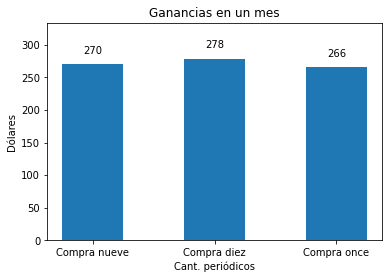

In [ ]:
fig, ax = plt.subplots()
barplot = plt.bar(nombres, gananciasMensuales, width=0.5)
altura = max(gananciasMensuales)*1.2

plt.title('Ganancias en un mes')
plt.xlabel('Cant. periódicos')
plt.ylabel('Dólares')
ax.set_ylim(0,altura)
autolabel(barplot)
plt.show()

### Predicción 1 año


In [ ]:
# acumulación de ventas
nueve = 0
diez = 0
once = 0
for i in range(365):
  prob = random.random()

  if prob <= 0.3:
    PidenNueve()
  elif 0.3 < prob <= 0.7:
    PidenDiez()
  else:
    PidenOnce()
  
# Arreglo de ganancias mensuales:
gananciasAnuales = [nueve, diez, once]

Imprimimos totales

In [ ]:
totales = f"""
Total de ganancias con nueve periódicos: {gananciasAnuales[0]}
Total de ganancias con diez periódicos: {gananciasAnuales[1]}
Total de ganancias con once periódicos: {gananciasAnuales[2]}
"""

print(totales)


Total de ganancias con nueve periódicos: 3285.0
Total de ganancias con diez periódicos: 3412.0
Total de ganancias con once periódicos: 3243.0



Gráfico para mejor visualización de resultados

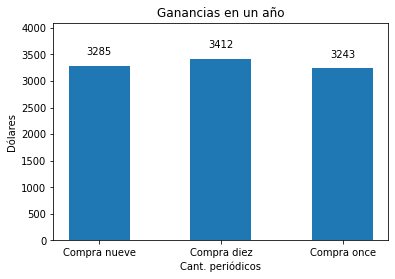

In [ ]:
fig, ax = plt.subplots()
barplot = plt.bar(nombres, gananciasAnuales, width=0.5)
altura = max(gananciasAnuales)*1.2

plt.title('Ganancias en un año')
plt.xlabel('Cant. periódicos')
plt.ylabel('Dólares')
ax.set_ylim(0,altura)
autolabel(barplot)
plt.show()

### Predicción 10 años

In [ ]:
for i in range(365*10):
  prob = random.random()

  if prob <= 0.3:
    PidenNueve()
  elif 0.3 < prob <= 0.7:
    PidenDiez()
  else:
    PidenOnce()
  
# Arreglo de ganancias mensuales:
gananciasDecada = [nueve, diez, once]

Imprimimos totales

In [ ]:
totales = f"""
Total de ganancias con nueve periódicos: {gananciasDecada[0]}
Total de ganancias con diez periódicos: {gananciasDecada[1]}
Total de ganancias con once periódicos: {gananciasDecada[2]}
"""

print(totales)


Total de ganancias con nueve periódicos: 36135.0
Total de ganancias con diez periódicos: 37752.0
Total de ganancias con once periódicos: 36115.0



Gráfico para mejor visualización de datos

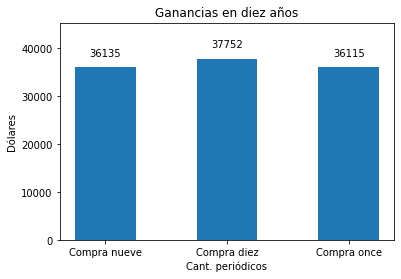

In [ ]:
fig, ax = plt.subplots()
barplot = plt.bar(nombres, gananciasDecada, width=0.5)
altura = max(gananciasDecada)*1.2

plt.title('Ganancias en diez años')
plt.xlabel('Cant. periódicos')
plt.ylabel('Dólares')
ax.set_ylim(0,altura)
autolabel(barplot)
plt.show()

### Análisis:

Para cada una de las predicciones, podemos notar en los gráficos que la mayor ganacia se obtiene comprando 10 periódicos. Esto se debe a que la probabilidad que compren 10 periódicos es levemente mayor a que compren otra cantidad. De hecho, en todas las gráficas se observa una diferencia de ganancia mínima cuando se compran 9 u 11 periódicos, dado que la probabilidad que compren estas cantidades es la misma; esto hace ambas opciones igual de viables.

### Conclusión:

La cantidad que más conviene comprar todos los días es de **10 periódicos**.